In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [27]:
# 1. Construct the transfer matrix at temperature T with external field B .
kb = 1
J  = 1
def bata(T):
    return 1/(T*kb)
def transfermatrix(T,B):
    b=bata(T)
    return np.array([[np.exp(b*J+b*B),np.exp(-b*J)   ],
                     [np.exp(-b*J)   ,np.exp(b*J-b*B)]])


[[2.71828183 0.60653066]
 [0.60653066 1.        ]]


In [151]:
# 2. Find the eigenvalues of the transfer matrix and compare to the exact results.
def eigenvalues(T,B):
    return np.linalg.eigvalsh(transfermatrix(T,B))
def exact_results(T,B):
    b       = bata(T)
    lamda_p = np.exp(b*J)*(np.cosh(b*B)+(np.sinh(b*B)**2+np.exp(-4*b*J))**0.5)
    lamda_m = np.exp(b*J)*(np.cosh(b*B)-(np.sinh(b*B)**2+np.exp(-4*b*J))**0.5)
    return np.array([round(lamda_m,8),round(lamda_p,8)])
T,B= 2, 1
print ("from transfer matrix",  eigenvalues(T,B))
print ('from  exact  results',exact_results(T,B))

from transfer matrix [0.80747436 2.91080747]
from  exact  results [0.80747436 2.91080747]


In [90]:
# 3. Evaluate the partition function Z at different system size N and T, B. 
#    Compare to the exact results.
impurity_matrix = np.array([[1, 0],
                            [0,-1]]) 
def Z(N,T,B):
    x = transfermatrix(T,B)
    y = np.copy(x)
    for i in np.arange(N-1):
        x = np.dot(x,y)
    return np.trace(x)

N,T,B=100,2,1

print (Z(N,T,B))
print (sum(eigenvalues(T,B)**N))
print (eigenvalues(T,B)[1]**N)

2.5196958965332103e+46
2.5196958965331977e+46
2.5196958965331977e+46


In [125]:
# 4. For a fixed N, T, B, evaluate [So,Sj], where j=0,1,.... N.
N ,T ,B = 2, 5 ,10
i ,j    = 0,1 
def S(i,j):
    a =np.eye(2)
    for k in np.arange(N):
        if k == i:
            a = np.dot(a,impurity_matrix)            
        if k == j:
            a = np.dot(a,impurity_matrix)
        a = np.dot(a,transfermatrix(T,B))
    a = np.trace(a)/Z(N,T,B)
    return a
print (S(i,j))

0.9676247526816236


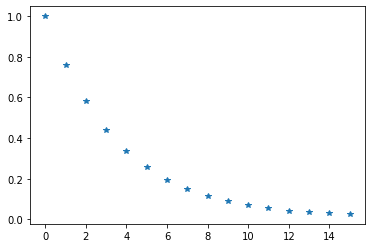

In [164]:
#5.(a) Plot [So,Sj] up to j = N/2 and show that it decays exponentially.
#      Please try several $N$, $T$, $B$. 
N ,T ,B ,i  = 32 ,1.  ,0., 0
s = [S(i,j) for j in np.arange(0,N)]
s.append(s[0])
plt.plot(s[0:int(N/2)],'*')

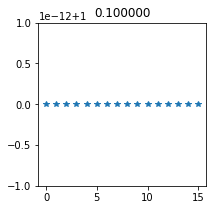

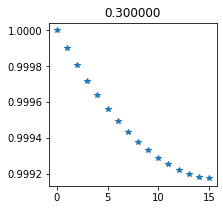

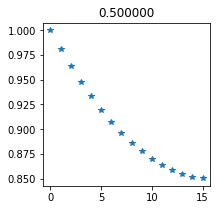

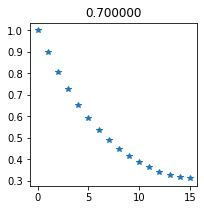

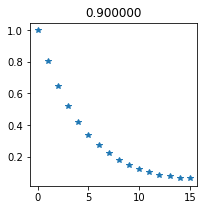

In [185]:
#5.(b)    What is the largest $N$ you can go? What is the lowest $T$ you can go?
N ,T ,B ,i  = 32 ,1.  ,0., 0
s = [S(i,j) for j in np.arange(0,N)]
s.append(s[0])
for k in np.arange(0.1,1,0.2):
    T = k
    plt.figure(figsize=(3,3))
    plt.title("%2f" %(k))
    plt.plot([S(i,j) for j in np.arange(0,N/2)],'*')

In [182]:
print ("%i" %5)

5
